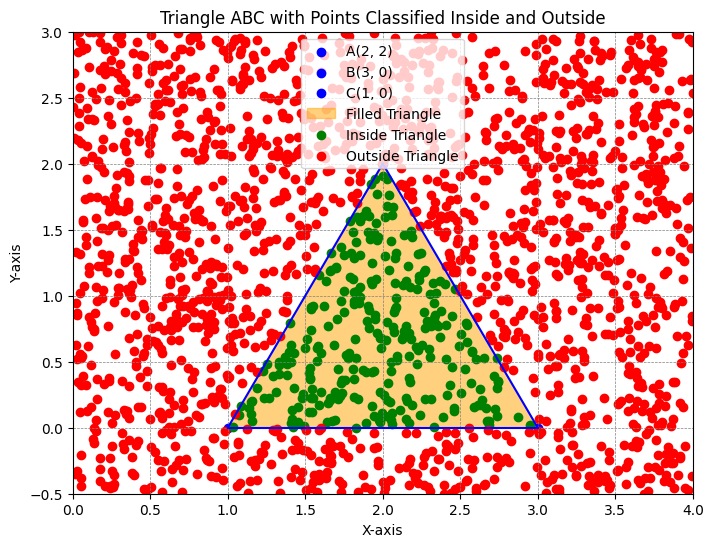

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# McCulloch-Pitts Neuron Class
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, inputs):
        # Calculate the weighted sum of the inputs
        weighted_sum = np.dot(self.weights, inputs)

        # Apply the threshold
        if weighted_sum >= self.threshold:
            return 1  # Neuron activates
        else:
            return 0  # Neuron doesn't activate

# Define the Area function that classifies points
def Area(x, y):
    neur1 = McCulloch_Pitts_neuron([2, -1], 2)
    neur2 = McCulloch_Pitts_neuron([-2, -1], -6)
    neur3 = McCulloch_Pitts_neuron([0, 1], 0)
    neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

    # Evaluate each neuron
    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))  # Final neuron decision

    return [z4]

# Generate random points within a defined range
def generate_random_point():
    x = random.uniform(0, 4)  # Random x between 0 and 3 (x boundary of the triangle)
    y = random.uniform(-0.5, 3)  # Random y between 0 and 2 (y boundary of the triangle)
    return x, y

# Lists to store points inside and outside the triangle
red_points = []  # Points outside the triangle (red)
green_points = []  # Points inside the triangle (green)

# Number of points to classify
num_points = 2000

# Generate and classify points
x_values = []
y_values = []

for _ in range(num_points):
    x, y = generate_random_point()
    x_values.append(x)
    y_values.append(y)

    # Classify points using the Area function
    z4_value = Area(x, y)
    if z4_value == [0]:  # z4 value is 0 (outside the triangle)
        red_points.append((x, y))
    else:  # z4 value is 1 (inside the triangle)
        green_points.append((x, y))

# Separate the points into x and y coordinates for plotting
red_x, red_y = zip(*red_points) if red_points else ([], [])
green_x, green_y = zip(*green_points) if green_points else ([], [])

# Plot the points and the triangle
plt.figure(figsize=(8, 6))

# Plot the triangle
A = (2, 2)
B = (3, 0)
C = (1, 0)

# Correct triangle plotting
plt.plot([A[0], B[0]], [A[1], B[1]], 'b')  # Line AB
plt.plot([B[0], C[0]], [B[1], C[1]], 'b')  # Line BC
plt.plot([C[0], A[0]], [C[1], A[1]], 'b')  # Line CA (fixed this line)

# Highlight the vertices
plt.scatter(*A, color='blue', label='A(2, 2)')
plt.scatter(*B, color='blue', label='B(3, 0)')
plt.scatter(*C, color='blue', label='C(1, 0)')

# Fill the triangle with orange color
plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='orange', alpha=0.5, label='Filled Triangle')

# Plot inside points (green) and outside points (red)
plt.scatter(green_x, green_y, color='green', label='Inside Triangle')
plt.scatter(red_x, red_y, color='red', label='Outside Triangle')

# Set axis limits and labels
plt.xlim(0, 4)
plt.ylim(0, 3)
plt.xticks([x * 0.5 for x in range(9)])  # 0, 0.5, 1.0, ..., 4.0
plt.yticks([y * 0.5 for y in range(-1, 7)])  # -0.5, 0.0, ..., 3.0

# Add grid and labels
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Triangle ABC with Points Classified Inside and Outside')
plt.show()

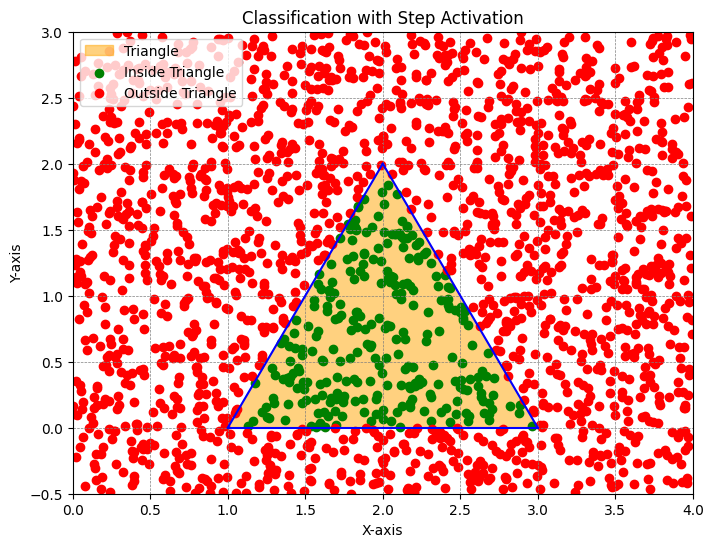

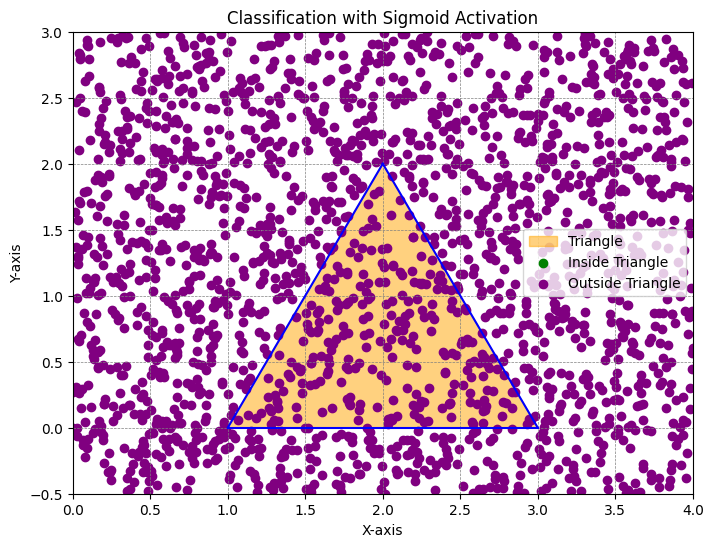

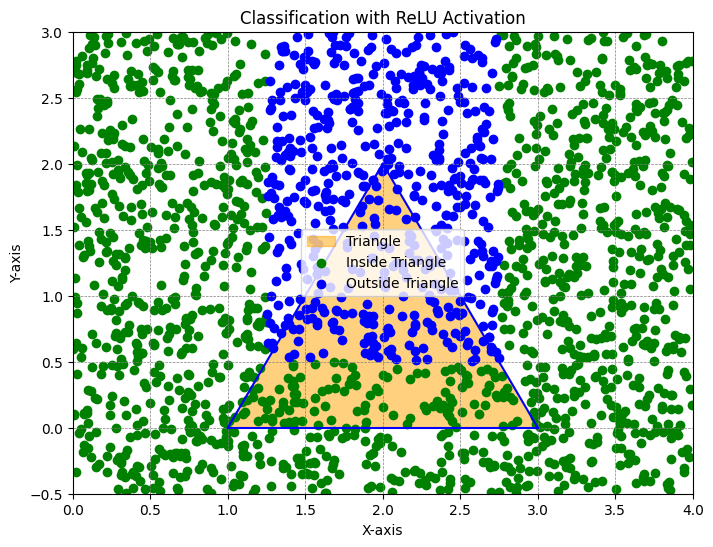

In [ ]:


# Activation functions
def step_activation(x):
    return 1 if x >= 0 else 0

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

# McCulloch-Pitts Neuron Class with variable activation function
class McCullochPittsNeuron:
    def __init__(self, weights, threshold, activation_func):
        self.weights = weights
        self.threshold = threshold
        self.activation_func = activation_func

    def model(self, inputs):
        weighted_sum = np.dot(self.weights, inputs) - self.threshold
        return self.activation_func(weighted_sum)

# Area function with variable activation function
def Area(x, y, activation_func):
    neur1 = McCullochPittsNeuron([2, -1], 2, activation_func)
    neur2 = McCullochPittsNeuron([-2, -1], -6, activation_func)
    neur3 = McCullochPittsNeuron([0, 1], 0, activation_func)
    neur4 = McCullochPittsNeuron([1, 1, 1], 3, activation_func)

    z1 = neur1.model([x, y])
    z2 = neur2.model([x, y])
    z3 = neur3.model([x, y])
    z4 = neur4.model([z1, z2, z3])

    return z4

# Generate random points
def generate_random_point():
    x = random.uniform(0, 4)
    y = random.uniform(-0.5, 3)
    return x, y

# Function to classify points and visualize
def classify_and_plot(activation_func, title, color):
    red_points = []
    green_points = []
    num_points = 2000

    for _ in range(num_points):
        x, y = generate_random_point()
        z4_value = Area(x, y, activation_func)
        if z4_value < 0.5:  # Classify as outside (red) for sigmoid and ReLU
            red_points.append((x, y))
        else:  # Classify as inside (green)
            green_points.append((x, y))

    # Separate points for plotting
    red_x, red_y = zip(*red_points) if red_points else ([], [])
    green_x, green_y = zip(*green_points) if green_points else ([], [])

    # Plot the triangle
    plt.figure(figsize=(8, 6))
    A = (2, 2)
    B = (3, 0)
    C = (1, 0)
    plt.plot([A[0], B[0]], [A[1], B[1]], 'b')
    plt.plot([B[0], C[0]], [B[1], C[1]], 'b')
    plt.plot([C[0], A[0]], [C[1], A[1]], 'b')
    plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='orange', alpha=0.5, label='Triangle')

    # Plot points
    plt.scatter(green_x, green_y, color='green', label='Inside Triangle')
    plt.scatter(red_x, red_y, color=color, label='Outside Triangle')

    # Formatting
    plt.xlim(0, 4)
    plt.ylim(-0.5, 3)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title(title)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# Visualize for step, sigmoid, and ReLU
classify_and_plot(step_activation, "Classification with Step Activation", "red")
classify_and_plot(sigmoid_activation, "Classification with Sigmoid Activation", "purple")
classify_and_plot(relu_activation, "Classification with ReLU Activation", "blue")